# Linear SVM

Un Linear SVM (Support Vector Machine) est un modèle d'apprentissage supervisé pour la classification binaire. Il cherche à trouver une droite (2D), un plan (3D) ou un hyperplan (dimension > 3D) qui sépare au mieux les données appartenant à deux classes.  
Le but est de maximiser la marge: la distance entre la droite de séparation et les points les plus proches de cette droite dans chaque classe. Les points les plus proches s'appellent les vecteurs de support. Ce sont les seuls points nécessaires au modèle.  
Il y a deux droites importantes, parallèles à la droite de séparation:
- la droite du côté de la classe positive: w⋅x+b=+1
- la droite du côté de la classe négative: w⋅x+b=−1  
La marge totale correspond à la distance entre ces deux droites:  
$$
M = \frac{2}{\|w\|}
$$  

Le SVM choisit la droite qui maximise la distance entre les deux classes (en minimisant la norme du vecteur normal), cad la droite qui donne la plus grande marge.  

- séparation robuste.
- peu sensible au bruit.
- généralise bien.

Enfaîtes, le SVM résout: 
$$
min\frac{1}{2}{\|w\|^2}
$$  
sous contraintes:
$$ yi​(w⋅xi​+b)≥1∀i
$$

Il s'agit d'un problème d'optimisation convexe a solution unique. Résolution: Lagrange + KKT + optimisation quadratique.  

## Synthetic data

In [70]:
from utility_svm import gen_data_twogaussians_2d
import numpy as np

# classe 1
n1 = 300
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])

# classe 2
n2 = 300
mu2 = np.array([-2, -2]); S2 = 3.5*np.array([[1, -0.25], [-0.25, 1/2]])

Xtrain, Ytrain = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

In [71]:
from sklearn.model_selection import train_test_split

# shuffle=True: mélange des données pour une meilleure répartition
# stratify=Ytrain: conserve la proportion des classes de Ytrain
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain, Ytrain,
                                   shuffle=True, test_size=1/3, stratify=Ytrain)

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain,
                                   shuffle=True, test_size=0.5, stratify=Ytrain)

La prédiction d'un Linear SVM se fait en calculant :

$$
f(x) = w \cdot x + b
$$

pour chaque point de Xtest: 
$$
f(x) = w \cdot x1 + w \cdot x2 + b
$$  
w=[w1​,w2​]: c'est une combinaison linéaire des vecteurs de supports; donne l'orientation de la droite.
b: biais, donne la position de la droite.  
Tout ce que le modèle retient, c'est w, b et les vecteurs de support.

Puis on détermine la classe prédite par :

$$
\hat{y} =
\begin{cases}
+1 & \text{si } f(x) \ge 0 \\
-1 & \text{si } f(x) < 0
\end{cases}
$$


C: paramètre de régularisation. Il contrôle l'équilibre entre maximiser la marge et minimiser les erreurs de prédiction:  
- C grand: on ne veut aucune erreur, le modèle va essayer de passer au plus près de tous les points, ce qui va donner une marge très petite; risque de surapprentissage.
- C petit: tolère certaines erreurs pour obtenir une marge plus large, modèle plus robuste au bruit.

Qu'est-ce que le **surapprentissage** ?  
Cela se produit lorsqu'un modèle apprend trop bien les données d'entraînement, y compris le bruit (erreurs, valeurs aberrantes) et les détails très spécifiques.  
=> fonctionne très bien sur les données Xtrain, mais généralise mal pour les données Xtest. 

Analogie: on souhaite apprendre à reconnaître les chiens et les chats.  
Bon apprentissage: le modèle retient les caractéristiques générales.
Surraprentissage: le modèle retient même la position exacte de la tâche sur le poil de chaque animal de Xtrain => impossible de reconnaître un nouveau chien car il n'aura pas ses mêmes tâches.

In [72]:
from sklearn.svm import SVC
C = 1 
clf_svm = SVC(kernel="linear", C=C)
clf_svm.fit(Xtrain, Ytrain)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


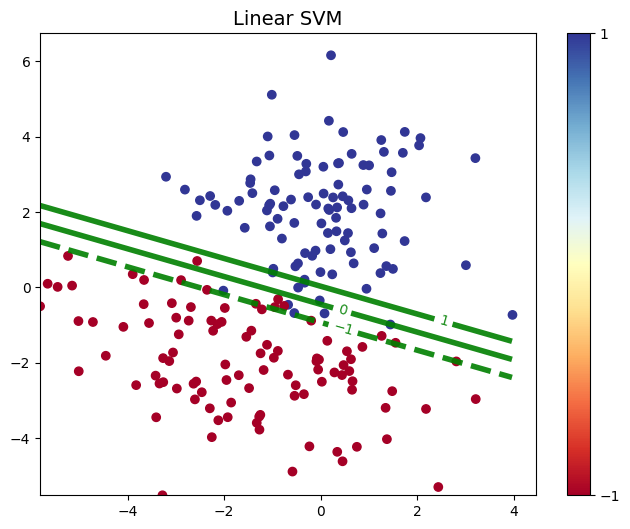

In [73]:
import matplotlib.pyplot as plt
from utility_svm import plot_decision_regions_2d
plot_decision_regions_2d(Xtrain, Ytrain, clf_svm, resolution=0.02, title="Linear SVM")

In [74]:
print(clf_svm.n_support_)
print(clf_svm.support_vectors_)

[9 9]
[[ 1.55311113 -1.46865125]
 [-1.34153833 -0.43281375]
 [-2.89227679  0.19448142]
 [-2.5588336   0.70324277]
 [ 2.81232315 -1.963132  ]
 [-0.94972335 -0.52099756]
 [-0.8812174  -0.31253772]
 [-0.75566738 -0.49030477]
 [ 1.26534503 -1.28559789]
 [-0.54543293 -0.67938264]
 [-0.33211104  0.12600773]
 [-2.01548222 -0.08416876]
 [ 1.44535772 -0.98352732]
 [-0.67338535 -0.4592239 ]
 [-0.01789452 -0.34433142]
 [ 0.08147395 -0.68951478]
 [-0.46633517 -0.0035437 ]
 [-0.99312146  0.39852639]]


In [75]:
print(f"Il y a {clf_svm.n_support_[0]+clf_svm.n_support_[1]} support vectors")

Il y a 18 support vectors


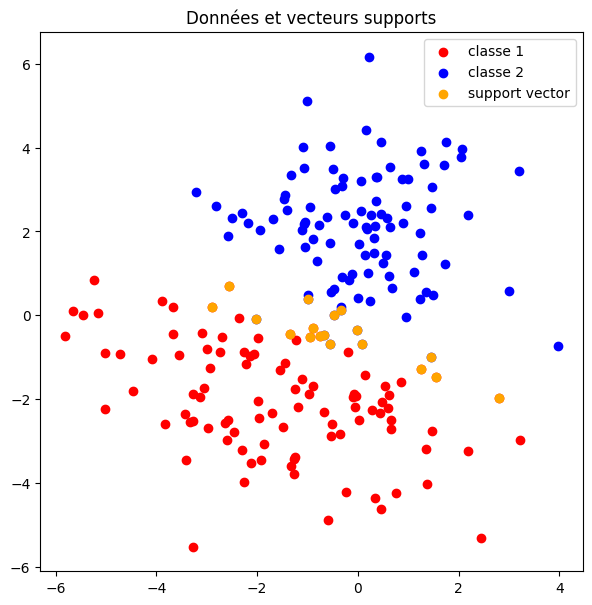

In [76]:
# affichage des données en mettant en évidence:
plt.figure(figsize=(7, 7))
# les données de la classe -1
plt.scatter(Xtrain[Ytrain == -1, 0], Xtrain[Ytrain == -1, 1], c="red", label="classe 1")
# les données de la classe 1
plt.scatter(Xtrain[Ytrain == 1, 0], Xtrain[Ytrain == 1, 1], c="blue", label="classe 2")
# les vecteurs support
plt.scatter(clf_svm.support_vectors_[:,0], clf_svm.support_vectors_[:,1], c="orange", label="support vector")
plt.title("Données et vecteurs supports")
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import accuracy_score
val_err_rate = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
print(f"taux d'erreur= {val_err_rate}")

taux d'erreur= 0.040000000000000036


In [78]:
print(f"Cela signifie que {100*val_err_rate}% des points de validation ont été mal classés, ce qui est un très bon résultat")

Cela signifie que 4.0000000000000036% des points de validation ont été mal classés, ce qui est un très bon résultat


In [79]:
val_err_rate = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))
print(f"taux d'erreur= {val_err_rate}")

taux d'erreur= 0.030000000000000027


In [80]:
print(f"Cela signifie que {100*val_err_rate}% des points d'entraînement ont été mal classés, ce qui est un très bon résultat, d'autant plus qu'il est casi similaire à celui du taux d'erreur de validation. Donc le modèle apprend bien.")

Cela signifie que 3.0000000000000027% des points d'entraînement ont été mal classés, ce qui est un très bon résultat, d'autant plus qu'il est casi similaire à celui du taux d'erreur de validation. Donc le modèle apprend bien.


On veut tout de même sélectionner la meilleure valeur de C. Pour cela on va tester différentes valeurs.

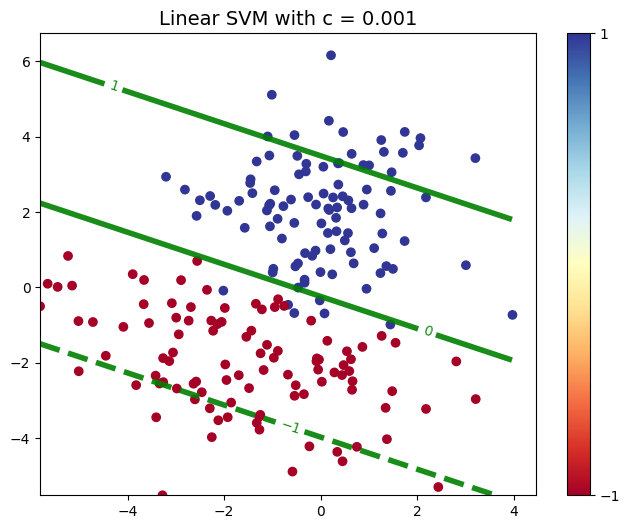

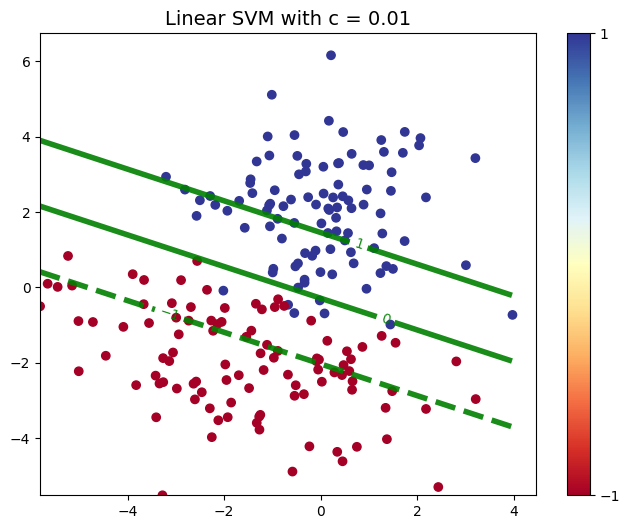

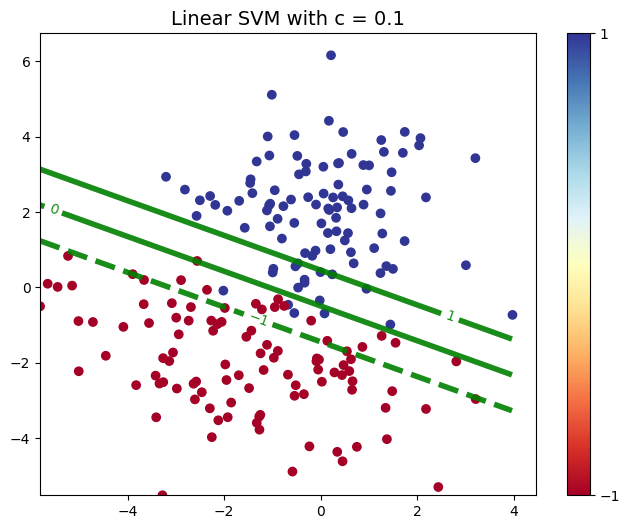

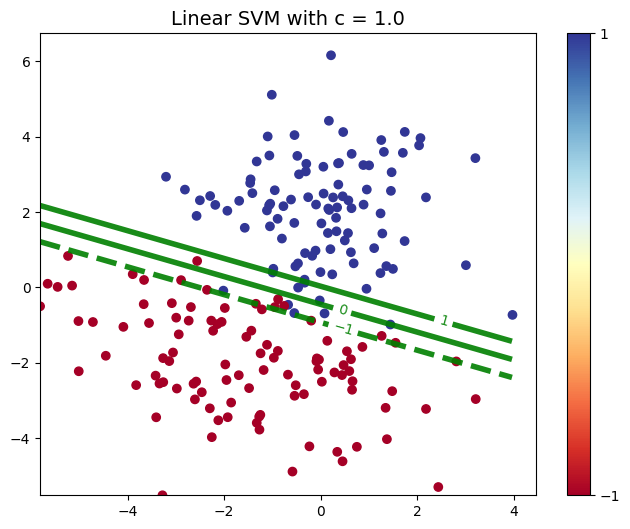

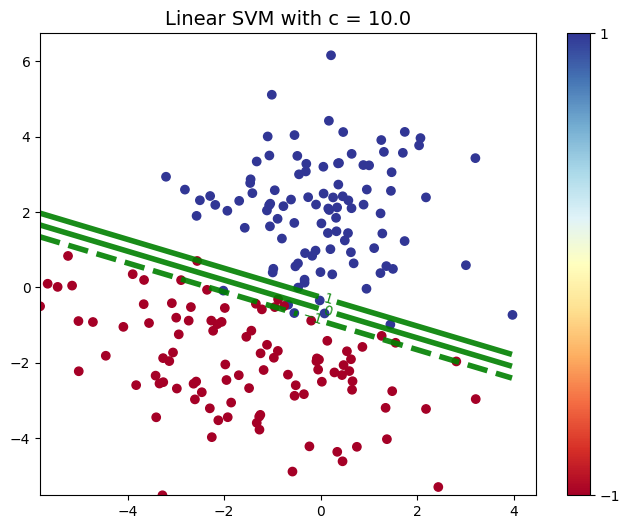

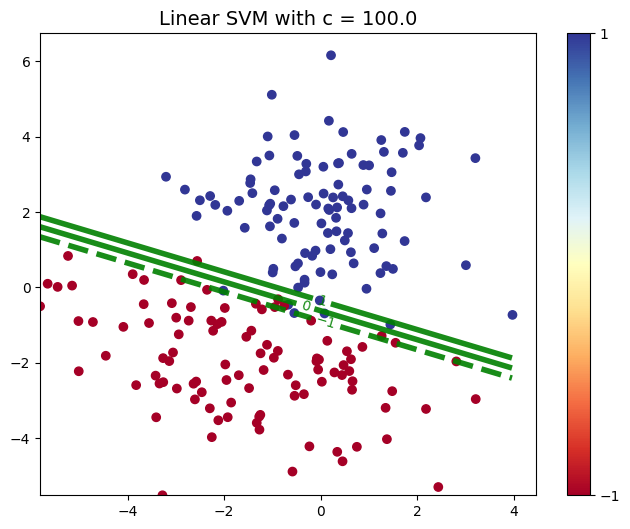

In [87]:
vectC = np.logspace(-3, 2, 6)
val_err_rate = np.empty(vectC.shape[0])
train_err_rate = np.empty(vectC.shape[0])

for ind_C, C in enumerate(vectC):
    clf_svm = SVC(kernel="linear", C=C)
    clf_svm.fit(Xtrain, Ytrain)
    plot_decision_regions_2d(Xtrain, Ytrain, clf_svm, resolution=0.02, title=f"Linear SVM with c = {C}")
    val_err_rate [ind_C] = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
    train_err_rate[ind_C] = 1 - accuracy_score(Yval, clf_svm.predict(Xtrain))

On voit bien la différence apporté par C dans la taille de la marge pour des valeurs de C de 0.001 à 1.0 mais ensuite juqu'à 100 c'est clairement moins net.

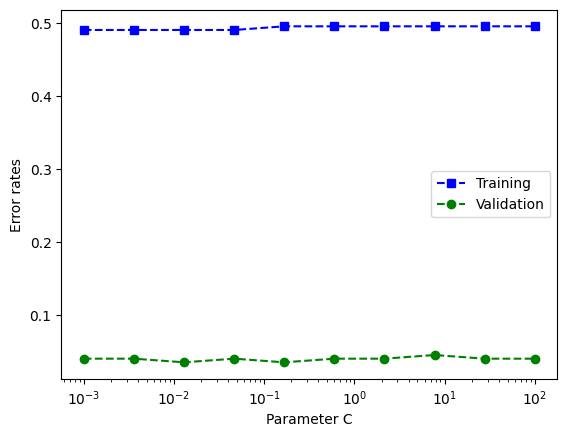

In [82]:
# affichage des taux d'erreurs selon les différentes valeurs de C
plt.figure()
plt.semilogx(vectC, train_err_rate, "bs--", label="Training")
plt.semilogx(vectC, val_err_rate, "go--", label="Validation")
plt.xlabel("Parameter C")
plt.ylabel("Error rates")
plt.legend(loc="best");

In [83]:
ind_min = val_err_rate.argmin()
Copt = vectC[ind_min]
print(f"\n Optimal C = {Copt}")


 Optimal C = 0.01291549665014884


Le C optimal est choisi en fonction du C qui donne le taux d'erreur le plus faible pour les prédictions sur les données de test.

In [89]:
# utiisation de C optimal pour Xtrain et Xtest
clf_svm = SVC(kernel="linear", C = Copt)
clf_svm.fit(Xtrain, Ytrain)
train_err_rate = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))
val_err_rate = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
test_err_rate = 1 - accuracy_score(Ytest, clf_svm.predict(Xtest))

print(f"Train error rate : {train_err_rate:.2f}\nValidation error rate : {val_err_rate:.2f}\
\nTest error rate : {test_err_rate:.2f}")

Train error rate : 0.02
Validation error rate : 0.04
Test error rate : 0.03


## Spam classification

In [133]:
from sklearn.preprocessing import StandardScaler
dataspam = np.loadtxt("spambase/spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase/spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]

X = dataspam[:,0:57]
Y = dataspam[:,-1]

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 1/3, train_size = 2/3)

In [135]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, shuffle=True, 
                                                  test_size=1/2, stratify=Y_train)

In [136]:
# normalise les données
sc = StandardScaler(with_mean=True, with_std=True)

# il est mieux de fit sur X_train puis appliquer sur les autres données
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [137]:
vectC = np.logspace(-3, 2, 10)
val_err_rate = np.empty(vectC.shape[0])
train_err_rate = np.empty(vectC.shape[0])

for ind_C, C in enumerate(vectC):
    clf_svm = SVC(kernel="linear", C=C)
    clf_svm.fit(X_train, Y_train)
    val_err_rate [ind_C] = 1 - accuracy_score(Y_val, clf_svm.predict(X_val))
    train_err_rate[ind_C] = 1 - accuracy_score(Y_train, clf_svm.predict(X_train))

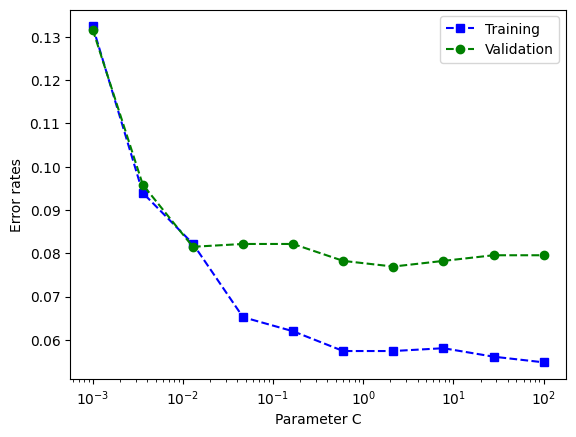

In [138]:
# affichage des taux d'erreurs selon les différentes valeurs de C
plt.figure()
plt.semilogx(vectC, train_err_rate, "bs--", label="Training")
plt.semilogx(vectC, val_err_rate, "go--", label="Validation")
plt.xlabel("Parameter C")
plt.ylabel("Error rates")
plt.legend(loc="best");

In [139]:
ind_min = val_err_rate.argmin()
Copt = vectC[ind_min]
print("\n Optimal C = {}".format(Copt))


 Optimal C = 2.1544346900318843


In [140]:
clf_svm = SVC(kernel="linear", C = Copt)
clf_svm.fit(X_train, Y_train)
train_err_rate = 1 - accuracy_score(Y_train, clf_svm.predict(X_train))
val_err_rate = 1 - accuracy_score(Y_val, clf_svm.predict(X_val))
test_err_rate = 1 - accuracy_score(Y_test, clf_svm.predict(X_test))

In [141]:
print(f"Train error rate : {train_err_rate:.2f}\nValidation error rate : {val_err_rate:.2f}\
\nTest error rate : {test_err_rate:.2f}")

Train error rate : 0.06
Validation error rate : 0.08
Test error rate : 0.07


Le SVM fournit des résultats légèrement mieux que la Logistic Regression, quelque que soit soit les données (Train, Validation, Test).

## Multi-class SVM: digits classification

Objectif: utiliser un SVM multiclasse pour classer les chiffres.

In [142]:
mnist_train = np.loadtxt("Mnist/mnist-app.csv", delimiter=",")
Y_train = mnist_train[:,-1]
X_train = mnist_train[:, 0:784]
# test set
mnist_test = np.loadtxt("Mnist/mnist-test.csv", delimiter=",")
Y_test = mnist_test[:,-1]
X_test = mnist_test[:, 0:784]

In [144]:
digits = [0, 2, 8]

# filtrer le training set
index_train = np.argwhere((Y_train == digits[0]) | (Y_train == digits[1]) | (Y_train == digits[2]))
X_train = X_train[np.squeeze(index_train), :]
Y_train = Y_train[np.squeeze(index_train)]

# filtrer le test set
index_test = np.argwhere((Y_test == digits[0]) | (Y_test == digits[1]) | (Y_test == digits[2]))
X_test = X_test[np.squeeze(index_test), :]
Y_test = Y_test[np.squeeze(index_test)]

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", C=1)
clf.fit(X_train, Y_train)

Un SVM multiclasse est une extension du SVM classique qui ne gère à l'origine que deux classes. Pour pouvoir classer plusieurs catégories, on utilise des stratégies qui combinent plusieurs SVM binaires. La première stratégie, appelée One-vs-Rest, consiste à entraîner un SVM pour chaque classe contre toutes les autres classes. Lors de la prédiction, chaque SVM donne un score et la classe avec le score le plus élevé est choisie. La deuxième stratégie, appelée One-vs-One, consiste à entraîner un SVM pour chaque paire de classes. Chaque SVM vote pour une classe et la classe qui reçoit le plus de votes est choisie. Dans scikit-learn, la stratégie par défaut pour le SVM multiclasse est One-vs-One. L'idée générale est donc d'utiliser le SVM binaire comme un bloc de construction et de combiner plusieurs SVM binaires pour gérer la classification de plusieurs catégories.